# Acquire and Prep - Wrangle

In the following lessons, we will walk through the data science pipeline using the following scenario:

I'm a university teacher, and I want to know when to worry about a student's progress.  I want to be able to work with any students who are at high risk of failing the class, so that I can try to prevent that from happening.  I have the grades of the three exams and the final grade from last semester's class.  I'm hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

## Acquire the Data

Let's use pandas to read our csv into a pandas DataFrame.

In [2]:
# Read csv file into pandas DataFrame.

df = pd.read_csv("student_grades.csv")

### Sample and Summarize

Let's take a look at the DataFrame we brought in and document our initial findings.

In [3]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [4]:
# 104 rows and 5 columns coming in.

df.shape

(104, 5)

In [5]:
# Display readable summary statistics for numeric columns. Why isn't exam3 showing up?

df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,104.0,52.500000,30.166206,1.0,26.75,52.5,78.25,104.0
exam1,103.0,78.621359,14.260955,57.0,70.00,79.0,92.00,100.0
exam2,104.0,77.307692,10.295703,65.0,70.00,75.0,89.00,93.0
final_grade,104.0,81.692308,10.918122,65.0,72.00,81.0,93.00,97.0


In [6]:
# Running .info() shows us that the exam3 column is not a numeric data type; it's an object.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


#### Acquire and Summarize Takeaways

- `exam1` has 1 Null value.
- `exam1` should likely be of type int64 once the Null value is addressed.
- There is likely an odd value in `exam3`, as it should be of type int64 but was read in as an object. We need to find that value.
- Given that there are limited attributes and limited observations with missing values, dropping the observations with missing values is probably a good way to go here. 

___

## Prepare the Data

### Finding Null Values

Let's check out some other ways to find Null values when you are dealing with a larger dataframe, especially one with more attributes and more missing values.

- np.nan values have a float data type. When a column you expect to have an integer data type reads in as a float, this may be signaling that there is one or more Null values present.

#### `.isnull().sum()`

In [7]:
# Find the total number of Null values in each column of our DataFrame.

df.isnull().sum()

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64

#### `.isnull().any()`

In [8]:
# Check for any Null values in each column of our DataFrame.

df.isnull().any()

student_id     False
exam1           True
exam2          False
exam3          False
final_grade    False
dtype: bool

In [9]:
# Return the names for any columns in our DataFrame with any Null values.

df.columns[df.isnull().any()]

Index(['exam1'], dtype='object')

### Finding Odd Values

Let's find the odd value in `exam3` that is causing this numeric column to be coerced into an object data type.

In [10]:
# Check out the values and their frequencies from exam3 column.

df.exam3.value_counts(dropna=False, ascending=True)

       1
85     8
87     8
70     8
86     8
94     8
79     8
95     8
75    15
96    16
78    16
Name: exam3, dtype: int64

In [11]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

df = df.replace(r'^\s*$', np.nan, regex=True)

Verify that our empty string has been replaced by a null

In [12]:
# Now .info() shows us that exam3 has a Null value instead of a whitespace disguised as a non-null value.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


### Drop Null Values

Let's drop observations that have any Null values; in this case, we have so few that we can simply drop rows instead of imputing values to save observations.

In [13]:
# Drop all rows with any Null values, assign to df, and verify.

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    object 
 4   final_grade  102 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


### Convert Data Types

Let's convert any data types we need to at this point.

In [14]:
# Change all column data tyes to int64, reassign to df, and verify.

df = df.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


You may want to fill your missing values with a value instead of dropping the rows. One way to do this is to apply the `.fillna()` method to your dataframe. 
```python
# Default arguments for value and method parameters.

df.fillna(value=None, method=None)
```

When running `.describe()`, we should now see `exam3` listed since we have converted it to a numeric type.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,102.0,53.313725,29.886909,1.0,28.25,53.5,78.75,104.0
exam1,102.0,78.833333,14.167375,57.0,70.00,79.0,92.00,100.0
exam2,102.0,77.500000,10.297313,65.0,70.00,75.0,89.00,93.0
exam3,102.0,84.294118,8.736617,70.0,78.00,85.0,94.00,96.0
final_grade,102.0,81.970588,10.833991,65.0,72.00,81.0,93.00,97.0


___

## Visualize Distributions

We can plot histograms and/or boxplots to see the distributions of single variables and check for skewness, outliers, and unit scales. *Note, we don't have to split our data before exploring single variables. We DO have to split our data before performing bi- and multi-variate exploration.*

#### `sns.displot()`

We can use Seaborn's `displot` to display the binned values from a column.

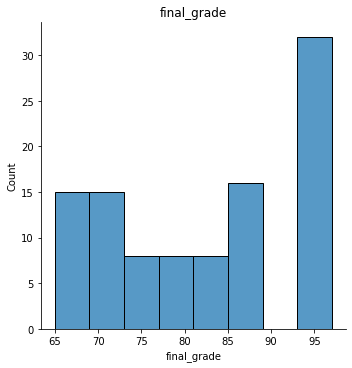

In [16]:
# The default is bins=10.

sns.displot(x='final_grade', data=df)

plt.title('final_grade')
plt.show()

#### `plt.subplot()` & `.hist()`

Here we'll loop through each of the numeric columns of interest and show the distribution of each on a separate subplot.

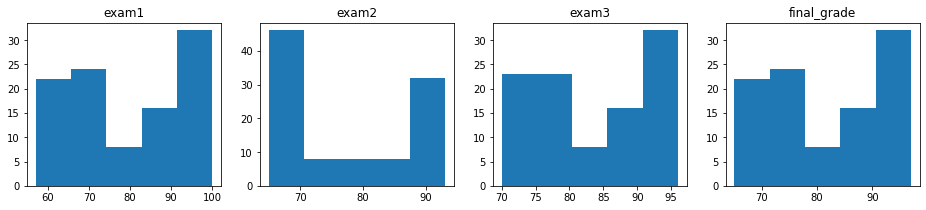

In [17]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,4, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins=5)
    
    # Hide gridlines.
    plt.grid(False)

#### `sns.boxplot()`

Seaborn's `.boxplot` will default to plotting *all* the numeric variables if we don't specify specific x and y values. 

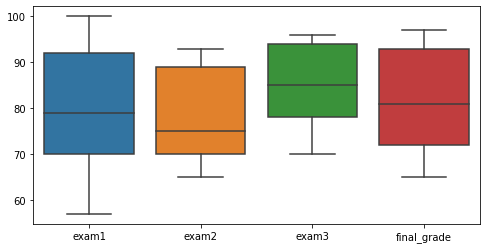

In [18]:
# We don't want to plot the `student_id` column.

plt.figure(figsize=(8,4))

# Create boxplots for all but student_id.
sns.boxplot(data=df.drop(columns=['student_id']))
plt.show()

#### Distribution Takeaways

- All of the column distributions are bimodal. There seem to be more students scoring on the upper and lower edges than in the middle 80s.
- `exam3` has the highest median score, exam1 and `final_grade` look to have the same or very similar medians, and `exam2` has the lowest median score.
- `exam2` has the least students scoring in the upper half of the grade range and the most scoring in the lower half.
- `exam1` and `final_grade` distributions look very similar in these initial charts although `exam1` has a larger range in scores than `final_grade`.

___

## Pipeline Function

We finalize these data wrangling steps (acquire and prepare) by writing a function that will reproduce the DataFrame with the necessary changes.

In [19]:
def wrangle_grades():
    '''
    Read student_grades csv file into a pandas DataFrame,
    drop student_id column, replace whitespaces with NaN values,
    drop any rows with Null values, convert all columns to int64,
    return cleaned student grades DataFrame.
    '''
    # Acquire data from csv file.
    grades = pd.read_csv('student_grades.csv')
    
    # Replace white space values with NaN values.
    grades = grades.replace(r'^\s*$', np.nan, regex=True)
    
    # Drop all rows with NaN values.
    df = grades.dropna()
    
    # Convert all columns to int64 data types.
    df = df.astype('int')
    
    return df

In [20]:
# Let's test out or wrangle function from above.

df = wrangle_grades()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


___

## Exercises I - Required

Let's review the steps we take at the beginning of each new module.

1. Create a new repository named `regression-exercises` in your GitHub; all of your Regression work will be housed here.
1. Clone this repository within your local `codeup-data-science` directory.
1. Create a `.gitignore` and make sure your list of 'files to ignore' includes your `env.py` file.
1. Ceate a `README.md` file that outlines the contents and purpose of your repository.
1. Add, commit, and push these two files.
1. Now you can add your `env.py` file to this repository to access the Codeup database server.
1. For these exercises, you will create `wrangle.ipynb` and `wrangle.py` files to hold necessary functions.
1. As always, add, commit, and push your work often.
---

## Exercises II - Required

Let's set up an example scenario as perspective for our regression exercises using the Telco dataset.

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer. 

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Telco data from the telco_churn database in the Codeup database server.

1. Acquire `customer_id`, `monthly_charges`, `tenure`, and `total_charges` from the `telco_churn` database for all customers with a 2-year contract.
1. Using your acquired Telco data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.
1. End with a `wrangle.py` file that contains the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values. Name your final function `wrangle_telco`.
---

## Exercises III - Challenge

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

1. Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.
1. Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.
1. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your `wrangle.py` file. Name your final function `wrangle_zillow`.